In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración visual general
sns.set_theme(style="whitegrid", context="paper")

# Cargar el archivo si aún no está cargado
df = pd.read_csv("2025-11_13_ALL_diff_2025-11_13_RMSE.csv")
#df.where(df['PH']==4, inplace=True)  # Filtrar por PH=2
#df=df[df['Function'].isin(['cSigP06', 'cSigP01'])]
df

,Algorithm,PH,Range,Function,A,B,C,D,E,A + B,RMSE,MSE,MAE,MAPE
0,CNN,2,ENTIRE,cSigp01MSE,-0.30,0.35,0.00,-0.04,0.00,0.05,0.14,8.02,0.21,0.00
1,CNN,2,TBR_2,cSigp01MSE,-0.17,0.00,0.00,0.15,0.02,-0.17,-0.83,-51.54,-0.58,-0.01
2,CNN,2,TBR_1,cSigp01MSE,0.11,0.00,0.00,-0.14,0.02,0.11,-0.61,-35.27,-0.69,-0.01
3,CNN,2,TIR,cSigp01MSE,-0.85,0.85,0.00,0.00,0.00,0.00,0.53,26.10,0.50,0.00
4,CNN,2,TAR_1,cSigp01MSE,0.79,-0.72,-0.02,-0.05,0.00,0.07,-0.58,-35.97,-0.49,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Linear,4,TBR_2,gMSE,17.73,0.00,0.00,-17.88,0.15,17.73,-1.58,-115.50,-3.30,-0.07
212,Linear,4,TBR_1,gMSE,9.06,0.00,0.00,-9.32,0.26,9.06,-0.36,-27.74,-1.94,-0.03
213,Linear,4,TIR,gMSE,-2.47,2.15,0.32,0.00,0.01,-0.32,2.59,170.20,1.83,0.01
214,Linear,4,TAR_1,gMSE,-0.60,0.36,0.24,-0.08,0.09,-0.24,0.96,73.89,0.43,0.00


# GRAFICA 1 Y 2: BOXPLOT de diferencias con RMSE

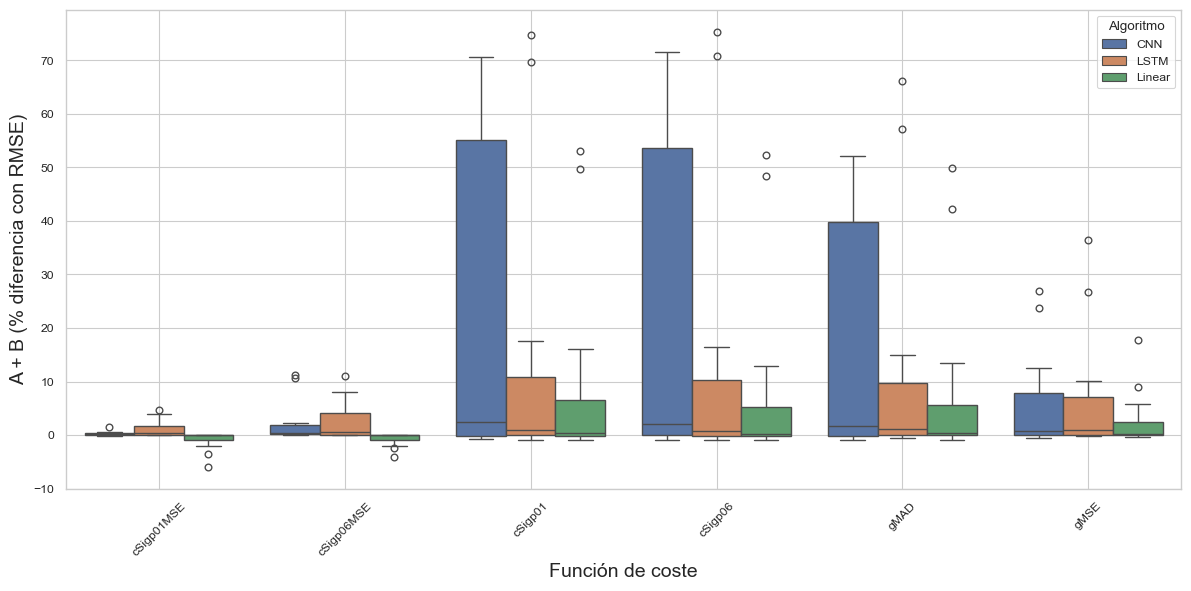

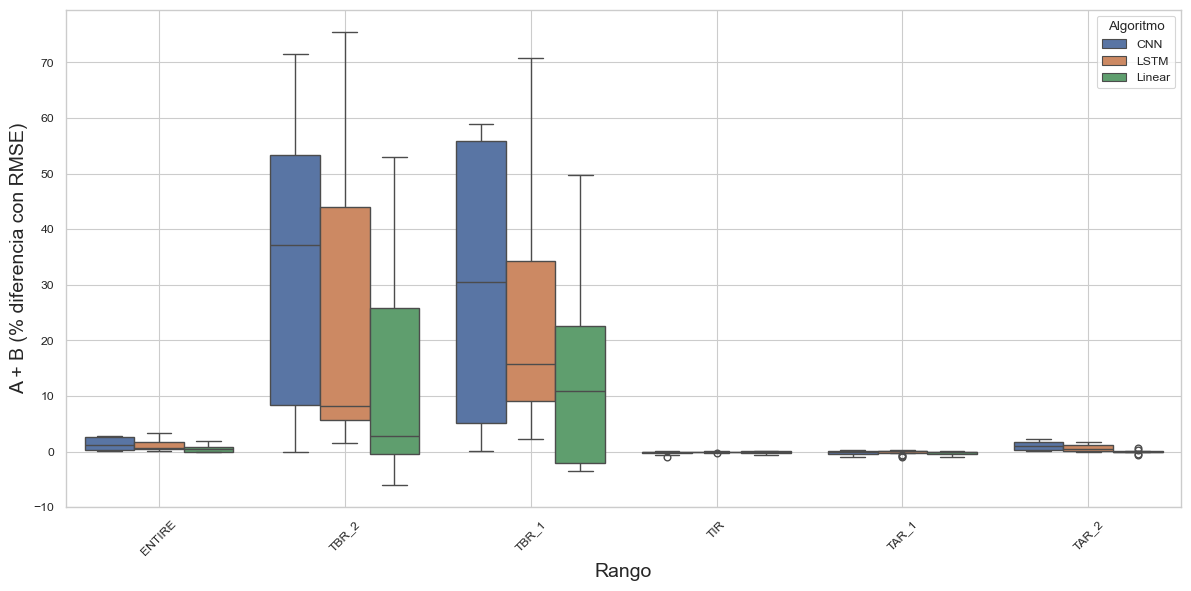

In [75]:
# Lista de métricas a graficar
metricas = ['A + B']#, 'RMSE', 'MAE', 'MSE', 'MAPE']

xy_fontsize = 14
tile_fontsize = 14

# Agrupar por función de pérdida
for metrica in metricas:
    plt.figure()
    sns.boxplot(data=df, x='Function', y=metrica, hue='Algorithm')
    #plt.title(f'Distribución de {metrica} por función de coste', fontsize=tile_fontsize)
    plt.xlabel('Función de coste', fontsize=xy_fontsize)
    if metrica=='A + B':
        plt.ylabel(f'{metrica} (% diferencia con RMSE)', fontsize=xy_fontsize) 
    else:
        plt.ylabel(f'{metrica} (diferencia con RMSE)', fontsize=xy_fontsize)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title='Algoritmo')
    plt.savefig(f'boxplot_{metrica}_vs_rmse_by_loss_function.png')
    plt.show()
print("================================")
# Agrupar por rango
for metrica in metricas:
    plt.figure()
    sns.boxplot(data=df, x='Range', y=metrica, hue='Algorithm')
    #plt.title(f'Distribución de {metrica} por rango', fontsize=tile_fontsize)
    plt.xlabel('Rango', fontsize=xy_fontsize)
    if metrica=='A + B':
        plt.ylabel(f'{metrica} (% diferencia con RMSE)', fontsize=xy_fontsize) 
    else:
        plt.ylabel(f'{metrica} (diferencia con RMSE)', fontsize=xy_fontsize)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title='Algoritmo')
    plt.savefig(f'boxplot_{metrica}_vs_rmse_by_range.png')
    plt.show()

# GRAFICA 3 Y 4: BOXPLOT de resultados sin restar con RMSE

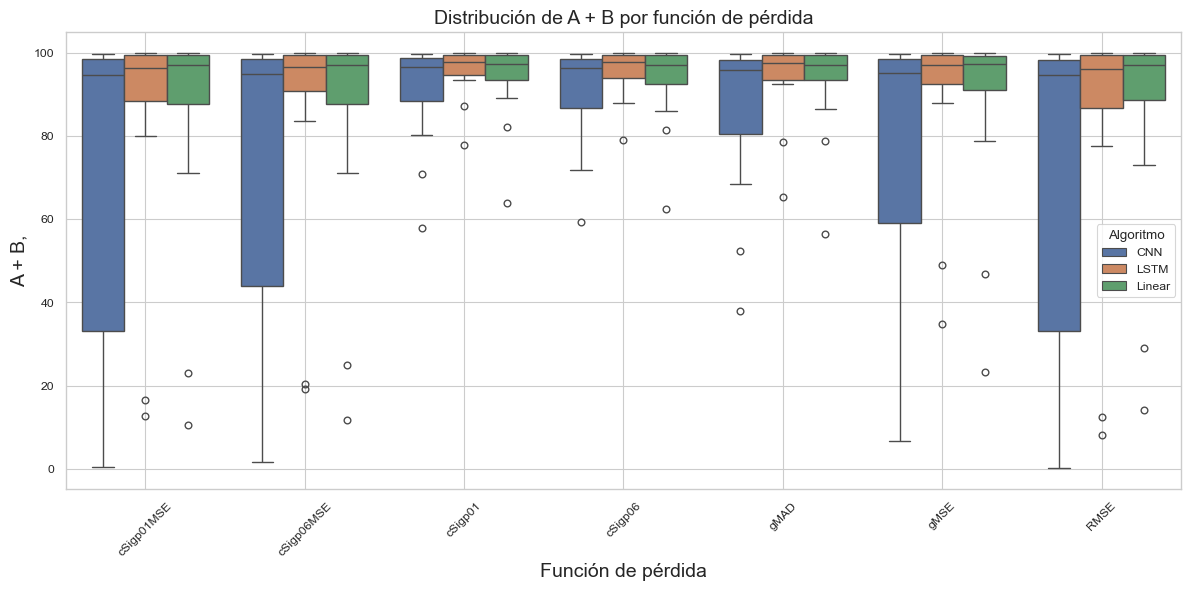

La CNN pasa de tener lo mismos un 0% que un 100% en A+B a tener por encima siempre de 50% en A+B y en promedio un 90% en A+B


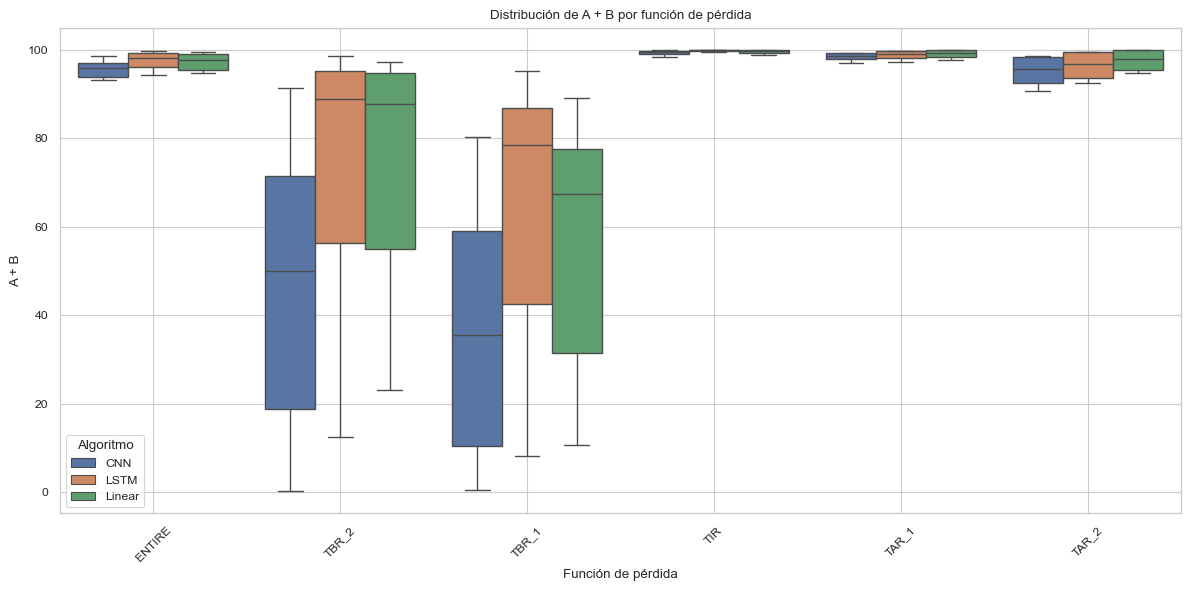

In [93]:
# Cargar el archivo si aún no está cargado
df = pd.read_csv("2025-11_13_ALL.csv")

# Agrupar por función de pérdida
for metrica in metricas:
    plt.figure()
    sns.boxplot(data=df, x='Function', y=metrica, hue='Algorithm')
    plt.title(f'Distribución de {metrica} por función de pérdida', fontsize=tile_fontsize)
    plt.xlabel('Función de pérdida', fontsize=xy_fontsize)
    plt.ylabel(f'{metrica},', fontsize=xy_fontsize)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title='Algoritmo')
    plt.show()
print("La CNN pasa de tener lo mismos un 0% que un 100% en A+B a tener por encima siempre de 50% en A+B y en promedio un 90% en A+B")
print("================================")
# Agrupar por rango
for metrica in metricas:
    plt.figure()
    sns.boxplot(data=df, x='Range', y=metrica, hue='Algorithm')
    plt.title(f'Distribución de {metrica} por función de pérdida')
    plt.xlabel('Función de pérdida')
    plt.ylabel(f'{metrica}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.legend(title='Algoritmo')
    plt.show()

# GRAFICA 5: Correlacion con Algoritmos y Funciones
## Diferencia con RMSE

Correlación global RMSE vs A+B: -0.8472981661478973
Correlación RMSE vs A+B para CNN: -0.8936064086142378
Correlación RMSE vs A+B para LSTM: -0.8089387184232623
Correlación RMSE vs A+B para Linear: -0.8053123818097447


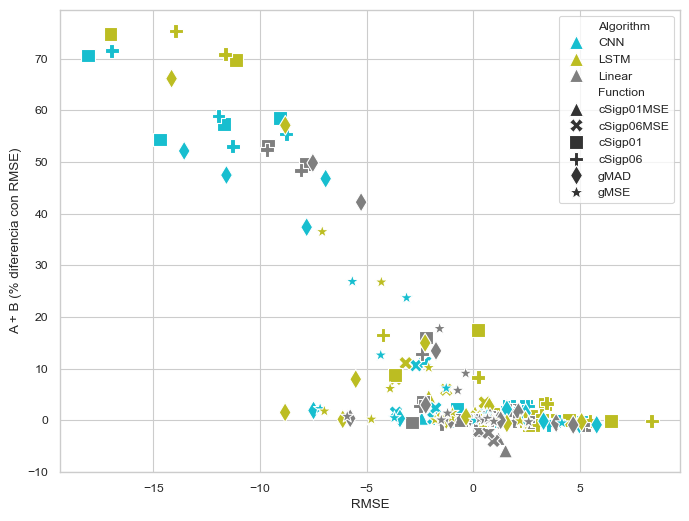

In [77]:
# Cargar datos
df = pd.read_csv("2025-11_13_ALL_diff_2025-11_13_RMSE.csv")

# Calcular índice global
corr_global = df['RMSE'].corr(df['A + B'])
print("Correlación global RMSE vs A+B:", corr_global)

# Calcular índice por algoritmo
algoritmos = df['Algorithm'].unique()

for alg in algoritmos:
    sub = df[df['Algorithm'] == alg]
    corr = sub['RMSE'].corr(sub['A + B'])
    print(f"Correlación RMSE vs A+B para {alg}: {corr}")

palette= {
    'CNN':    '#17becf',   # cian brillante
    'LSTM':   '#bcbd22',   # amarillo oliva intenso
    'Linear': '#7f7f7f'    # gris neutro
}


markers = {
    'cSigp01MSE': '^',   # círculo
    'cSigp06MSE': 'X',   # aspa gruesa
    'cSigp01': 's',      # cuadrado
    'cSigp06': 'P',      # plus grueso
    'gMAD': 'd',         # diamante
    'gMSE': '*',         # triángulo
}


#correlacion entre RMSE y A + B
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='RMSE', y='A + B', hue='Algorithm', style='Function', s=100, markers=markers, palette=palette)
#plt.title('Correlación entre RMSE y A + B')
plt.xlabel('RMSE')
plt.ylabel('A + B (% diferencia con RMSE)')
plt.show()


# GRAFICA 6: Correlacion con Algoritmos y Funciones
## Rendimiento en terminos absolutos

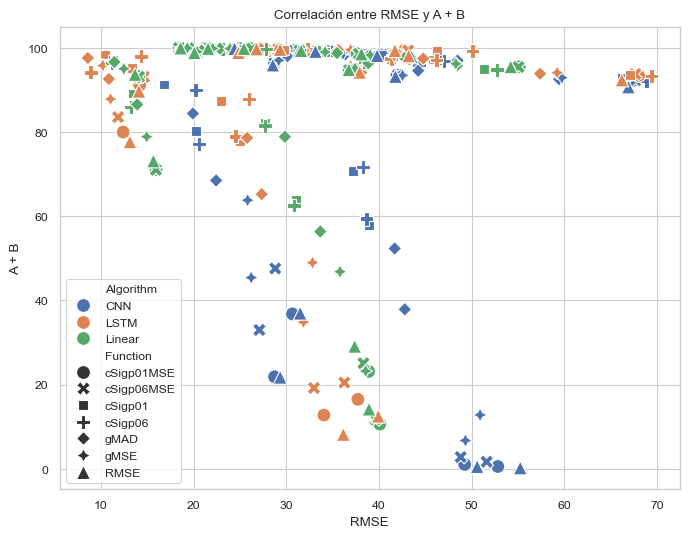

In [78]:
# Cargar datos
df = pd.read_csv("2025-11_13_ALL.csv")

#calcular y graficar la correlacion entre RMSE y A + B


#correlacion entre RMSE y A + B
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='RMSE', y='A + B', hue='Algorithm', style='Function', s=100)
plt.title('Correlación entre RMSE y A + B')
plt.xlabel('RMSE')
plt.ylabel('A + B')
plt.show()

# GRAFICA 7: Correlacion con Algoritmos, Funciones y Rangos
## Diferencia con RMSE
Se unifica todo dentro de una grafica de las siguiente forma:

- Se dibuja circulos de color diferente, uno para cada RANGO de glucosa (color circulo = RANGO)
- Sobre eso se dibuja una figura cuya forma es diferrente para cada FUNCION (forma figura = FUNCION COSTE)
- El color interno de cada figura depende del algoritmo (color figura = ALGORITMO) 

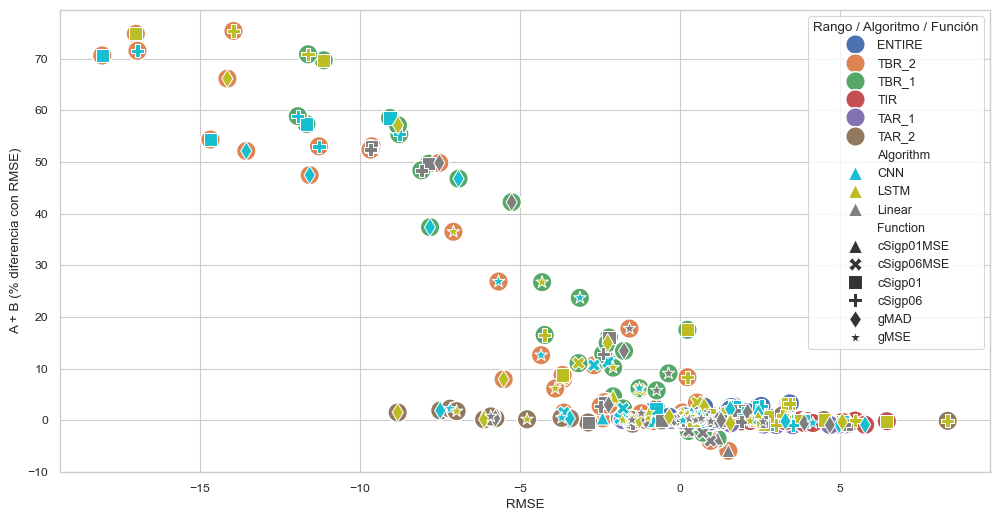

In [79]:
# Cargar datos
df = pd.read_csv("2025-11_13_ALL_diff_2025-11_13_RMSE.csv")


palette= {
    'CNN':    '#17becf',   # cian brillante
    'LSTM':   '#bcbd22',   # amarillo oliva intenso
    'Linear': '#7f7f7f'    # gris neutro
}

markers = {
    'cSigp01MSE': '^',   # círculo
    'cSigp06MSE': 'X',   # aspa gruesa
    'cSigp01': 's',      # cuadrado
    'cSigp06': 'P',      # plus grueso
    'gMAD': 'd',         # diamante
    'gMSE': '*',         # triángulo
}

"""
'o'	círculo	
's'	cuadrado	
'^'	triángulo arriba	
'v'	triángulo abajo	
'X'	aspa gruesa	
'x'	aspa fina	
'D'	diamante	
'P'	pentágono	
'*'	estrella	
'+'	plus	
'1','2','3','4'	triángulos direccionales
"""

#correlacion entre RMSE y A + B
#plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='RMSE', y='A + B', hue='Range', s=200, )
sns.scatterplot(data=df, x='RMSE', y='A + B', hue='Algorithm', style='Function', s=90,
                palette=palette, markers=markers)
#plt.title('Correlación entre RMSE y A + B')
plt.xlabel('RMSE')
plt.ylabel('A + B (% diferencia con RMSE)')
ax = plt.gca()
ax.legend(fontsize=9,  title='Rango / Algoritmo / Función',)

plt.show()


# GRAFICA 8 y posteriores: Correlacion con Algoritmos, Funciones y Rangos
## Diferencia con RMSE
Una grafica para cada algortimo


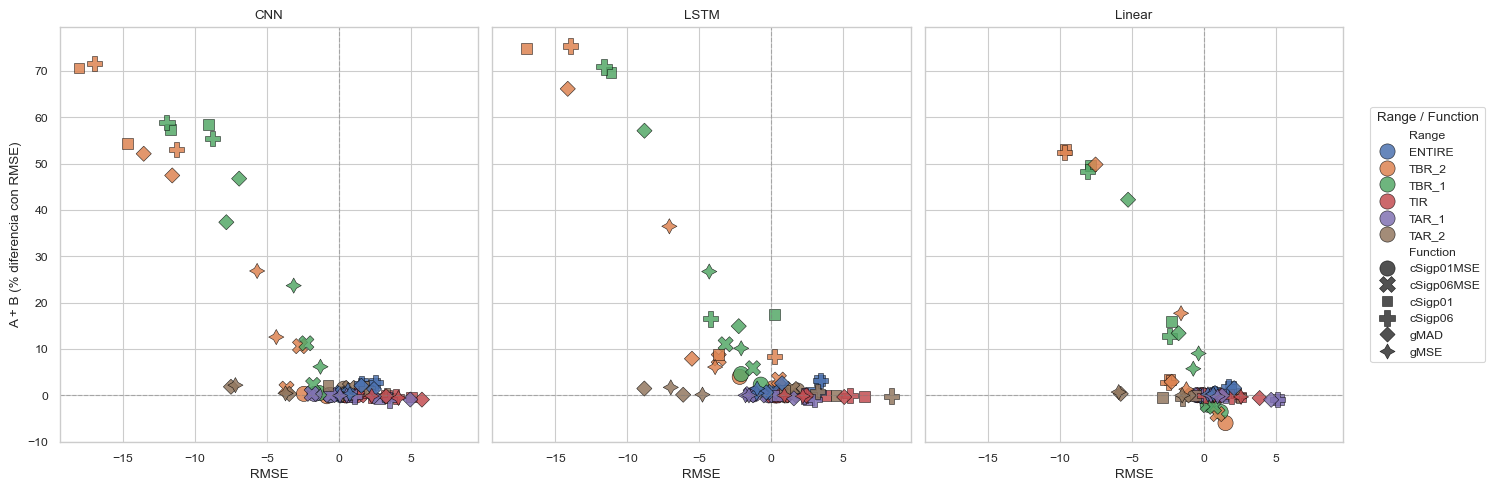

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ================
# Cargar datos
# ================
df = pd.read_csv("2025-11_13_ALL_diff_2025-11_13_RMSE.csv")

sns.set_theme(style="whitegrid", context="paper")

# Paleta para Range
range_palette = {
    'ENTIRE': '#1f77b4',
    'TBR_2':  '#ff7f0e',
    'TBR_1':  '#2ca02c',
    'TIR':    '#d62728',
    'TAR_1':  '#9467bd',
    'TAR_2':  '#8c564b',
}


# Lista de algoritmos en orden fijo
algorithms = ["CNN", "LSTM", "Linear"]
n_alg = len(algorithms)

fig, axes = plt.subplots(1, n_alg, figsize=(5*n_alg, 5), sharex=True, sharey=True)

for i, alg in enumerate(algorithms):
    ax = axes[i] if n_alg > 1 else axes
    sub = df[df["Algorithm"] == alg]

    sns.scatterplot(
        data=sub,
        x="RMSE",
        y="A + B",
        hue="Range",
        #palette=range_palette,
        style="Function",
        #markers=markers,
        s=120,
        edgecolor="black",
        linewidth=0.4,
        alpha=0.85,
        ax=ax,
        legend=(i == n_alg - 1)  # solo leyenda en el último
    )

    ax.axvline(0, ls='--', lw=0.8, color='grey', alpha=0.5)
    ax.axhline(0, ls='--', lw=0.8, color='grey', alpha=0.5)

    ax.set_title(alg)
    ax.set_xlabel("RMSE")
    if i == 0:
        ax.set_ylabel("A + B (% diferencia con RMSE)")
    else:
        ax.set_ylabel("")


# Ajustar leyenda del último eje
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(
    handles, labels,
    title="Range / Function",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    frameon=True
)

plt.tight_layout()
plt.show()


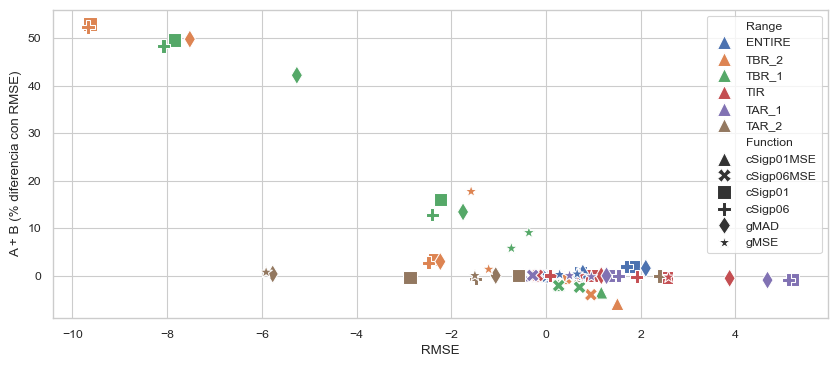

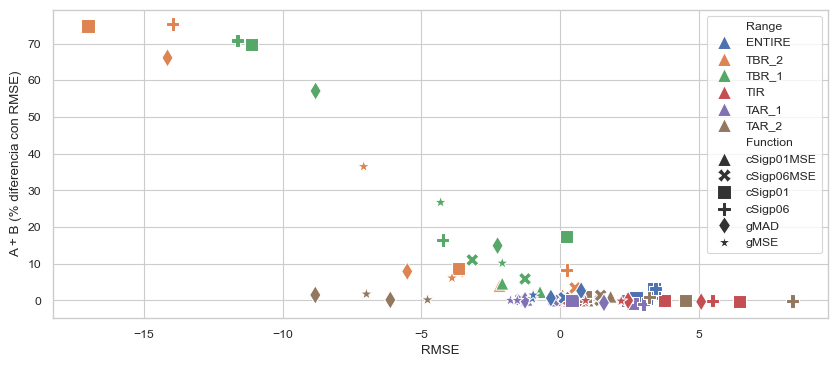

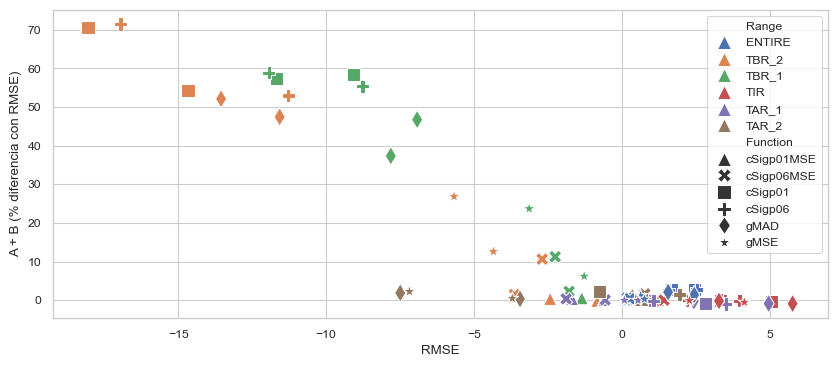

In [91]:
df2=df.copy().where(df['Algorithm']=='Linear')

plt.figure(figsize=(10,4))
sns.scatterplot(data=df2, x='RMSE', y='A + B', hue='Range', style='Function', s=90, markers=markers)

#plt.title('Correlación entre RMSE y A + B')
plt.xlabel('RMSE')
plt.ylabel('A + B (% diferencia con RMSE)')

plt.show()

df2=df.copy().where(df['Algorithm']=='LSTM')

plt.figure(figsize=(10,4))
sns.scatterplot(data=df2, x='RMSE', y='A + B', hue='Range', style='Function', s=90, markers=markers)

#plt.title('Correlación entre RMSE y A + B')
plt.xlabel('RMSE')
plt.ylabel('A + B (% diferencia con RMSE)')

plt.show()

df2=df.copy().where(df['Algorithm']=='CNN')

plt.figure(figsize=(10,4))
sns.scatterplot(data=df2, x='RMSE', y='A + B', hue='Range', style='Function', s=90, markers=markers)

#plt.title('Correlación entre RMSE y A + B')
plt.xlabel('RMSE')
plt.ylabel('A + B (% diferencia con RMSE)')

plt.show()